### Importando as bibliotecas

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [371]:
df = pd.read_csv("data/train.csv")

In [372]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
df.shape

(891, 12)

### Tratamento de outliers

(<matplotlib.axes._subplots.AxesSubplot at 0x1f988ee9ba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f988ee9ba8>)

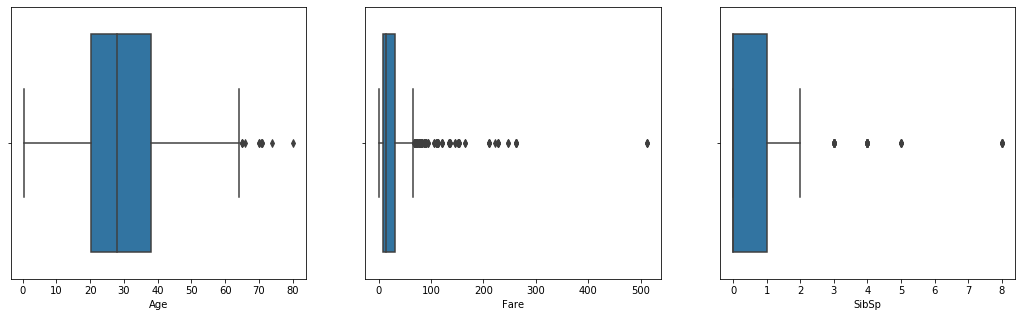

In [374]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1), sns.boxplot(df.Age)
plt.subplot(1, 3, 2), sns.boxplot(df.Fare)
plt.subplot(1, 3, 3), sns.boxplot(df.SibSp)

In [375]:
df[df.SibSp > 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [376]:
print("qtd pessoas 1ª classe:" , df[df.Pclass == 1].shape, ", qtd pessoas fare > 300", df[df.Fare > 300].shape)

qtd pessoas 1ª classe: (216, 12) , qtd pessoas fare > 300 (3, 12)


In [377]:
df[df.Fare > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [378]:
df.drop(df.index[[258, 679, 737]], inplace=True)

In [379]:
print("qtd pessoas 1ª classe:" , df[df.Pclass == 1].shape, ", qtd pessoas fare > 300", df[df.Fare > 300].shape)

qtd pessoas 1ª classe: (213, 12) , qtd pessoas fare > 300 (0, 12)


Removemos os outliers que tinha um Fare maior que 300, já que estavam destoando muito dos demais e eram somente 3 registros.

Vemos que existem outliers em algumas variáveis como idade e Irmão/cônjuges. Apesar de estar presentes eles representam um valor real, diferente de um ruído, assim a remoção não foi necessária.

Caso necessário poderíamos aplicar as seguintes ações:

<ul>
    <li>Excluir, caso o dado é fruto de um erro de input ou atrapalharia o modelo.</li>
    <li>Caso necessário analisaríamos os dados separadamente para entender .</li>
    <li>Aplicar um algoritmo de clusterização ou vizinhos para definir o seu novo valor, para não perder uma linha inteira de registros.</li>
</ul>

### Tratamento de missings

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    888 non-null int64
Survived       888 non-null int64
Pclass         888 non-null int64
Name           888 non-null object
Sex            888 non-null object
Age            711 non-null float64
SibSp          888 non-null int64
Parch          888 non-null int64
Ticket         888 non-null object
Fare           888 non-null float64
Cabin          202 non-null object
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


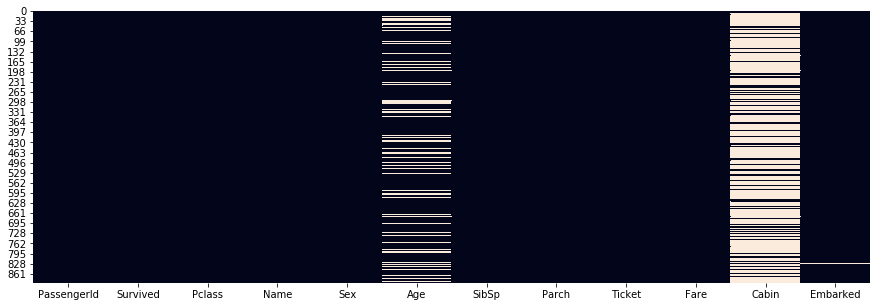

In [381]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False)

Temos 3 colunas com valores faltantes: Age, Cabin e Embarked. Vamos tratar cada coluna de uma forma.

#### Age

Preencher a idade com a média entre as Pclass

In [382]:
#media entre as classes
idade_1 = int(df[df.Pclass == 1].Age.mean(skipna = True))
idade_2 = int(df[df.Pclass == 2].Age.mean(skipna = True))
idade_3 = int(df[df.Pclass == 3].Age.mean(skipna = True))

In [383]:
df.loc[(df.Pclass == 1) & (df.Age.isnull()), "Age"] = idade_1
df.loc[(df.Pclass == 2) & (df.Age.isnull()), "Age"] = idade_2
df.loc[(df.Pclass == 3) & (df.Age.isnull()), "Age"] = idade_3

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    888 non-null int64
Survived       888 non-null int64
Pclass         888 non-null int64
Name           888 non-null object
Sex            888 non-null object
Age            888 non-null float64
SibSp          888 non-null int64
Parch          888 non-null int64
Ticket         888 non-null object
Fare           888 non-null float64
Cabin          202 non-null object
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


#### Cabin

Como essa variável tem muito valor faltante nós iremos deletar.

In [385]:
df.drop("Cabin", axis=1, inplace=True)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    888 non-null int64
Survived       888 non-null int64
Pclass         888 non-null int64
Name           888 non-null object
Sex            888 non-null object
Age            888 non-null float64
SibSp          888 non-null int64
Parch          888 non-null int64
Ticket         888 non-null object
Fare           888 non-null float64
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.2+ KB


#### Embarked

Como esse preditor tem poucos missings nós preencheremos com o valor da moda da coluna

In [387]:
from collections import Counter

In [388]:
print(Counter(df.Embarked))

Counter({'S': 644, 'C': 165, 'Q': 77, nan: 2})


In [389]:
df.loc[df.Embarked.isnull(), "Embarked"] = "S"

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    888 non-null int64
Survived       888 non-null int64
Pclass         888 non-null int64
Name           888 non-null object
Sex            888 non-null object
Age            888 non-null float64
SibSp          888 non-null int64
Parch          888 non-null int64
Ticket         888 non-null object
Fare           888 non-null float64
Embarked       888 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.2+ KB


### Remoção de variáveis que não são úteis para o uso no Machine Learning

Removeremos variáveis que não agregam informação para a utilização em um algoritmo de ML

In [391]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [392]:
df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

In [393]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Categorização de variáveis contínuas e discretas

Criaremos uma variável chamada FxEtaria que representa a faixa etária das pessoas com os valores:

<ul>
    <li>1 = menor 10</li>
    <li>2 = entre 10 e 19</li>
    <li>3 = entre 20 e 29</li>
    <li>4 = entre 30 e 39</li>
    <li>5 = entre 40 e 40</li>
    <li>6 = entre 50 e 59</li>
    <li>7 = entre 60 e 69</li>
    <li>8 = maior 69</li>
</ul>

In [394]:
df.FxEtaria = ""

In [395]:
df.loc[(df.Age < 10), "FxEtaria"] = 1 
df.loc[(df.Age >= 10) & (df.Age < 20), "FxEtaria"] = 2 
df.loc[(df.Age >= 20) & (df.Age < 30), "FxEtaria"] = 3 
df.loc[(df.Age >= 30) & (df.Age < 40), "FxEtaria"] = 4 
df.loc[(df.Age >= 40) & (df.Age < 50), "FxEtaria"] = 5 
df.loc[(df.Age >= 50) & (df.Age < 60), "FxEtaria"] = 6 
df.loc[(df.Age >= 60) & (df.Age < 70), "FxEtaria"] = 7
df.loc[(df.Age >= 70), "FxEtaria"] = 8 

In [396]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FxEtaria
0,0,3,male,22.0,1,0,7.2500,S,3.0
1,1,1,female,38.0,1,0,71.2833,C,4.0
2,1,3,female,26.0,0,0,7.9250,S,3.0
3,1,1,female,35.0,1,0,53.1000,S,4.0
4,0,3,male,35.0,0,0,8.0500,S,4.0


Dividiremos a variável tarifa em 3 classes utilizando outra técnica e adicionaremos na variável FxFare

In [397]:
df.loc[:, "FxFare"] = pd.cut(df['Fare'], bins = 3, labels=[1, 2, 3]).astype(int)

In [398]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FxEtaria,FxFare
0,0,3,male,22.0,1,0,7.2500,S,3.0,1
1,1,1,female,38.0,1,0,71.2833,C,4.0,1
2,1,3,female,26.0,0,0,7.9250,S,3.0,1
3,1,1,female,35.0,1,0,53.1000,S,4.0,1
4,0,3,male,35.0,0,0,8.0500,S,4.0,1


In [399]:
print(Counter(df["FxFare"]))

Counter({1: 828, 2: 43, 3: 17})


Os dados foram categorizados, porém dessa forma os dados seguiram uma distribuição uniforme entre os valores das tarifas. Nesse caso, como observado no boxplot acima, os outliers fariam uma grande diferença no tratamento.

### Transormando os dados Categóricos em contínuos

Transformaremos as variáveis Embarked e Sex em variáveis discretas.

In [400]:
from sklearn.preprocessing import LabelEncoder

In [401]:
df.loc[:, "SexD"] = LabelEncoder().fit_transform(df.Sex)
df.loc[:, "EmbarkedD"] = LabelEncoder().fit_transform(df.Embarked)

In [402]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FxEtaria,FxFare,SexD,EmbarkedD
0,0,3,male,22.0,1,0,7.2500,S,3.0,1,1,2
1,1,1,female,38.0,1,0,71.2833,C,4.0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,3.0,1,0,2
3,1,1,female,35.0,1,0,53.1000,S,4.0,1,0,2
4,0,3,male,35.0,0,0,8.0500,S,4.0,1,1,2


### Correlação/associação de variáveis

In [403]:
df[["Pclass", "SexD", "Age", "SibSp", "Parch", "Fare", "EmbarkedD", "FxEtaria", "FxFare", "Survived"]].corr()

,Pclass,SexD,Age,SibSp,Parch,Fare,EmbarkedD,FxEtaria,FxFare,Survived
Pclass,1.000000,0.132881,-0.403306,0.080937,0.018212,-0.604960,0.153435,-0.377481,-0.398524,-0.334068
SexD,0.132881,1.000000,0.079987,-0.114799,-0.247003,-0.222361,0.109402,0.077152,-0.157207,-0.545899
Age,-0.403306,0.079987,1.000000,-0.242551,-0.174966,0.128748,-0.012964,0.979069,0.064866,-0.052250
SibSp,0.080937,-0.114799,-0.242551,1.000000,0.415141,0.211816,0.065560,-0.233821,0.058330,-0.033395
Parch,0.018212,-0.247003,-0.174966,0.415141,1.000000,0.263910,0.039682,-0.169113,0.153195,0.082157
Fare,-0.604960,-0.222361,0.128748,0.211816,0.263910,1.000000,-0.196229,0.122151,0.876400,0.261742
EmbarkedD,0.153435,0.109402,-0.012964,0.065560,0.039682,-0.196229,1.000000,-0.013944,-0.186567,-0.160824
FxEtaria,-0.377481,0.077152,0.979069,-0.233821,-0.169113,0.122151,-0.013944,1.000000,0.058756,-0.049762
FxFare,-0.398524,-0.157207,0.064866,0.058330,0.153195,0.876400,-0.186567,0.058756,1.000000,0.179924
Survived,-0.334068,-0.545899,-0.052250,-0.033395,0.082157,0.261742,-0.160824,-0.049762,0.179924,1.000000


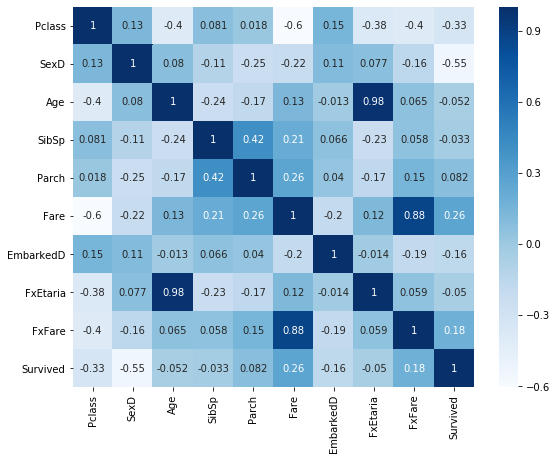

In [404]:
plt.figure(figsize=(9, 7))
sns.heatmap(df[["Pclass", "SexD", "Age", "SibSp", "Parch", "Fare", "EmbarkedD", "FxEtaria", "FxFare", "Survived"]].corr(), cmap="Blues", annot = True)

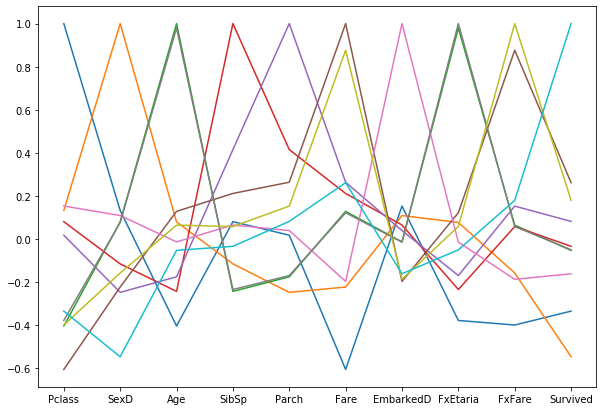

In [405]:
plt.figure(figsize=(10, 7))
plt.plot(df[["Pclass", "SexD", "Age", "SibSp", "Parch", "Fare", "EmbarkedD", "FxEtaria", "FxFare", "Survived"]].corr())

Como tinhamos criado 2 variáveis a partir de variáveis já existentes, temos uma grande correlação entre elas [Age, FxEtaria] e [Fare, FxFare], e elas indicam relações com a classe Survived muito semelhante entre seus pares. <br>
A coluna Pclass demonstrou uma correlação negativa razoável em contrapartida com o Fare onde demontrou uma certa correlação positiva.<br> 
A mais representativa foi a variável sexo, onde 1 representa o sexo masculino, e quando é 1 a correlação é negativa, indicando que os homens tinham mais propensão a não sobreviver.

### PCA

Para utilizar o PCA para a transformação de features devemos padronizar os dados, já que a variância é muito importante nessa análise e utilizaremos somente os dados contínuos. Não utilizaremos as variáveis que passamos para categóricos.

In [406]:
from sklearn.preprocessing import StandardScaler

In [407]:
X = df[["Pclass", "SexD", "Age", "SibSp", "Parch", "Fare", "EmbarkedD"]]
X = StandardScaler().fit_transform(X)

In [408]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6
0,0.824123,0.737799,-0.546978,0.430627,-0.473353,-0.566959,0.582138
1,-1.575290,-1.355382,0.663121,0.430627,-0.473353,0.989016,-1.958099
2,0.824123,-1.355382,-0.244453,-0.475527,-0.473353,-0.550557,0.582138
3,-1.575290,-1.355382,0.436227,0.430627,-0.473353,0.547171,0.582138
4,0.824123,0.737799,0.436227,-0.475527,-0.473353,-0.547519,0.582138


In [409]:
from sklearn.decomposition import PCA

In [420]:
pca = PCA(n_components=2)

comp_princ = pca.fit_transform(X)

In [421]:
princ = pd.DataFrame(data=comp_princ, columns=["comp1", "comp2"])

In [422]:
princ.head()

,comp1,comp2
0,-1.328918,0.494467
1,2.433310,-0.894149
2,-0.745776,0.311325
3,1.530662,-0.436890
4,-1.318933,-0.498740


In [423]:
#ajustando index do dataframe
df.reset_index(inplace = True, drop = True)
princ = pd.concat([princ, df["Survived"]], axis=1)

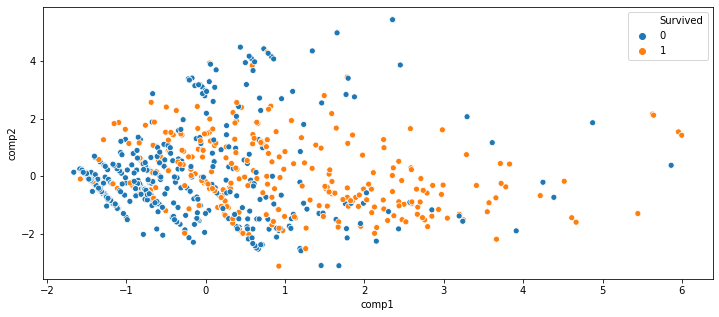

In [424]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x= "comp1", y = "comp2", data = princ, hue="Survived")